In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(y_train.shape, y_test.shape)

(31367, 43) (7842, 43)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 75s 76ms/step - loss: 2.1679 - accuracy: 0.4580 - val_loss: 0.6641 - val_accuracy: 0.8066
Epoch 2/25
981/981 [==============================] - 76s 77ms/step - loss: 0.8162 - accuracy: 0.7535 - val_loss: 0.3195 - val_accuracy: 0.9137
Epoch 3/25
981/981 [==============================] - 77s 78ms/step - loss: 0.5325 - accuracy: 0.8403 - val_loss: 0.2152 - val_accuracy: 0.9441
Epoch 4/25
981/981 [==============================] - 75s 77ms/step - loss: 0.4181 - accuracy: 0.8772 - val_loss: 0.1394 - val_accuracy: 0.9591
Epoch 5/25
981/981 [==============================] - 80s 81ms/step - loss: 0.3608 - accuracy: 0.8960 - val_loss: 0.1180 - val_accuracy: 0.9670
Epoch 6/25
981/981 [==============================] - 74s 75ms/step - loss: 0.3207 - accuracy: 0.9078 - val_loss: 0.1241 - val_accuracy: 0.9624
Epoch 7/25
981/981 [==============================] - 73s 75ms/step - loss: 0.3027 - accuracy: 0.9149 - val_loss: 0.0943 - val_accuracy:

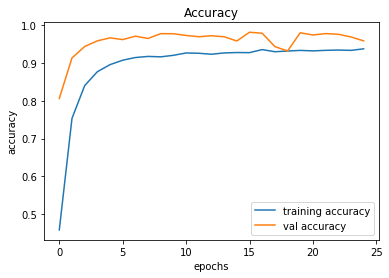

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

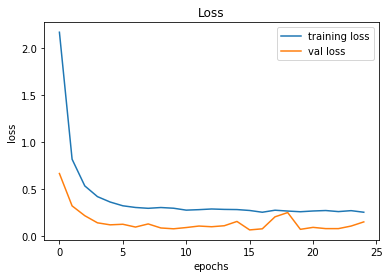

In [12]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [14]:
print(accuracy_score(labels, pred))

0.9223277909738717


In [15]:
model.save("traffic_classifier.h5")